#  Projeto Diamonds

## Preparando código

In [30]:
# importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
from sklearn.linear_model import LinearRegression, RANSACRegressor

In [2]:
hist_dia = pd.read_csv('data/diamonds.csv')
rick_dia = pd.read_csv('data/rick_diamonds.csv')

In [ ]:
hist_dia.info()

In [ ]:
hist_dia.describe()

In [15]:
hist_dia.corr()['price']

carat          0.922186
depth         -0.012037
table          0.127832
price          1.000000
x              0.885019
y              0.864059
z              0.860247
clar          -0.148668
color_class   -0.173129
cut_class     -0.055150
Name: price, dtype: float64

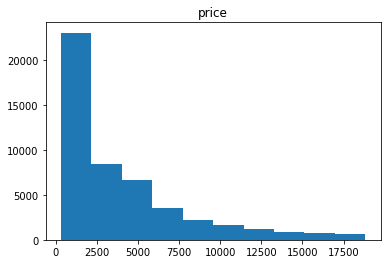

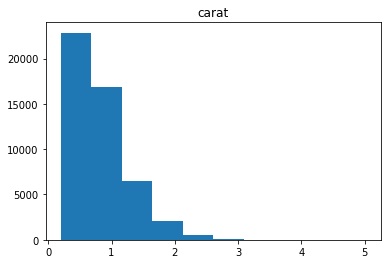

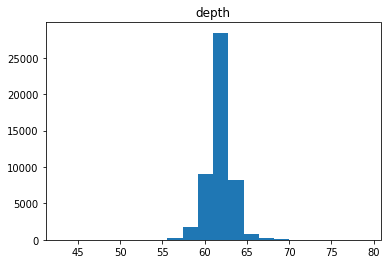

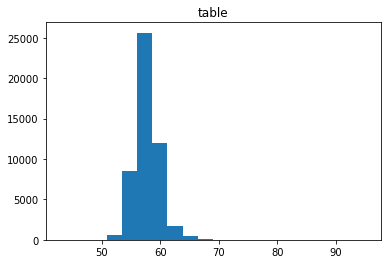

In [3]:
plt.hist(hist_dia['price'])
plt.title('price')
plt.show()

plt.hist(hist_dia['carat'], bins=10)
plt.title('carat')
plt.show()

plt.hist(hist_dia['depth'], bins=20)
plt.title('depth')
plt.show()

plt.hist(hist_dia['table'], bins=20)
plt.title('table')
plt.show()

##  Primeira Baseline - Média

In [ ]:
# Avaliando a média de preços
hist_dia['price'].mean()

In [8]:
def calcula_erro_media(df):
    ''' Esta funcao recebe um dataframe com uma coluna 'price_predicted' e calcula
        o RMSE em relacao a media de preço de diamantes
    '''
    
    from sklearn.metrics import mean_squared_error
    from sklearn.metrics import r2_score
    
    y_mean = [hist_dia['price'].mean() for i in range(len(df))]
    
    rmse_media = mean_squared_error(y_mean, df['price_predicted'])
    r2_media = r2_score(y_mean, df['price_predicted'])
    
    return rmse_media, r2_media

##  Desenvolvimento

###  Primeira Regressão Linear - Sem tratamento

Erro: 1562.4289387419713

In [4]:
X = hist_dia[['carat', 'depth', 'table', 'x', 'y', 'z']]
y = hist_dia['price']

In [5]:
model_1 = LinearRegression()
model_1.fit(X,y)

LinearRegression()

In [6]:
rick_dia['price_predicted'] = model_1.predict(rick_dia[['carat', 'depth', 'table', 'x', 'y', 'z']])

In [9]:
calcula_erro_media(rick_dia)

(13587721.414728124, 0.0)

###  Tratamento 1: escolhendo colunas numéricas

Erro: 1586.858254661364

In [ ]:
hist_dia.corr()['price']

In [ ]:
X = hist_dia[['carat', 'x', 'y', 'z']]
y = hist_dia['price']

In [ ]:
model_2 = LinearRegression()
model_2.fit(X,y)

In [ ]:
rick_dia['price_predicted'] = model_2.predict(rick_dia[['carat', 'x', 'y', 'z']])

In [ ]:
calcula_erro_media(rick_dia)

###  Tratando coluna 'carat'

**Esta frente pode ser abandonada !!!**

Erro: 1587.6633357235637

In [ ]:
plt.scatter(x='carat', y='price', data=hist_dia)
plt.show()

In [ ]:
hist_dia.loc[hist_dia['carat']>3.2, 'carat'] = hist_dia['carat'].median()

In [ ]:
X = hist_dia[['carat', 'x', 'y', 'z']]
y = hist_dia['price']

In [ ]:
model_3 = LinearRegression()
model_3.fit(X,y)

In [ ]:
rick_dia['price_predicted'] = model_3.predict(rick_dia[['carat', 'x', 'y', 'z']])

In [ ]:
calcula_erro_media(rick_dia)

###  Tratando coluna 'clarity'

Erro: 1398.109285038074

In [ ]:
hist_dia['clarity'].value_counts()

In [10]:
# Transformando strings da coluna 'clarity' em inteiros discretos
clarity_order = {'I1': 0, 'SI2': 1, 'SI1': 2, 'VS2': 3, 'VS1': 4, 'VVS2': 5, 'VVS1': 6, 'IF': 7}

hist_dia['clar'] = hist_dia['clarity'].apply(lambda x: clarity_order[x])
rick_dia['clar'] = rick_dia['clarity'].apply(lambda x: clarity_order[x])

In [ ]:
X = hist_dia[['carat', 'clar', 'x', 'y', 'z']]
y = hist_dia['price']

In [ ]:
model_4 = LinearRegression()
model_4.fit(X,y)

In [ ]:
rick_dia['price_predicted'] = model_4.predict(rick_dia[['carat', 'clar', 'x', 'y', 'z']])

In [ ]:
calcula_erro_media(rick_dia)

###  Tratando coluna 'color'

Erro: 1300.193480874001

In [ ]:
hist_dia['color'].value_counts()

In [11]:
# Transformando strings da coluna 'clarity' em inteiros discretos
color_order = {'J': 0, 'I': 1, 'H': 2, 'G': 3, 'F': 4, 'E': 5, 'D': 6}

hist_dia['color_class'] = hist_dia['color'].apply(lambda x: color_order[x])
rick_dia['color_class'] = rick_dia['color'].apply(lambda x: color_order[x])

In [ ]:
X = hist_dia[['carat', 'clar', 'color_class', 'x', 'y', 'z']]
y = hist_dia['price']

In [ ]:
model_5 = LinearRegression()
model_5.fit(X,y)

In [ ]:
rick_dia['price_predicted'] = model_5.predict(rick_dia[['carat', 'clar', 'color_class', 'x', 'y', 'z']])

In [ ]:
calcula_erro_media(rick_dia)

###  Tratando coluna 'cut'

Erro: 1288.2588485040092

In [ ]:
hist_dia['cut'].value_counts()

In [12]:
# Transformando strings da coluna 'clarity' em inteiros discretos
cut_order = {'Fair': 0, 'Good': 1, 'Very Good': 2, 'Premium': 3, 'Ideal': 4}

hist_dia['cut_class'] = hist_dia['cut'].apply(lambda x: cut_order[x])
rick_dia['cut_class'] = rick_dia['cut'].apply(lambda x: cut_order[x])

In [ ]:
X = hist_dia[['carat', 'clar','color_class', 'cut_class', 'x', 'y', 'z']]
y = hist_dia['price']

In [ ]:
model_6 = LinearRegression()
model_6.fit(X,y)

In [ ]:
rick_dia['price_predicted'] = model_6.predict(rick_dia[['carat', 'clar', 'color_class', 'cut_class', 'x', 'y', 'z']])

In [ ]:
calcula_erro_media(rick_dia)

###  Tratando colunas y e z

Erro: 1289.9603309540764

In [ ]:
plt.hist(hist_dia['y']);

In [ ]:
plt.hist(hist_dia['z']);

In [ ]:
hist_dia.loc[hist_dia['y']>10].shape

In [ ]:
hist_dia.loc[hist_dia['z']>7].shape

In [ ]:
hist_dia.loc[hist_dia['y']>10, 'y'] = hist_dia['y'].median()
hist_dia.loc[hist_dia['z']>7, 'z'] = hist_dia['z'].median()

In [ ]:
X = hist_dia[['carat', 'clar','color_class', 'cut_class', 'x', 'y', 'z']]
y = hist_dia['price']

In [ ]:
model_7 = LinearRegression()
model_7.fit(X,y)

In [ ]:
rick_dia['price_predicted'] = model_7.predict(rick_dia[['carat', 'clar', 'color_class', 'cut_class', 'x', 'y', 'z']])

In [ ]:
calcula_erro_media(rick_dia)

### Utilizando apenas coluna 'carat'

Erro:1605.1517570736253

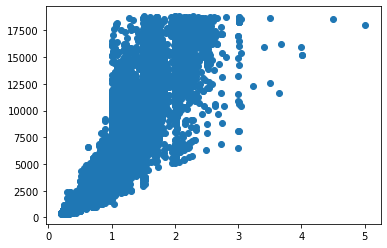

In [22]:
plt.scatter(x='carat', y='price', data=hist_dia)

In [16]:
X = hist_dia[['carat']]
y = hist_dia['price']

In [17]:
model_7 = LinearRegression()
model_7.fit(X,y)

LinearRegression()

In [19]:
rick_dia['price_predicted'] = model_7.predict(rick_dia[['carat']])

In [20]:
calcula_erro_media(rick_dia)

(13463966.918186825, 0.0)

###  Desconsiderando colunas 'x', 'y' e 'z'

Erro: 1294.2985338102117

In [23]:
X = hist_dia[['carat', 'clar','color_class', 'cut_class']]
y = hist_dia['price']

In [24]:
model_8 = LinearRegression()
model_8.fit(X,y)

LinearRegression()

In [26]:
rick_dia['price_predicted'] = model_8.predict(rick_dia[['carat', 'clar', 'color_class', 'cut_class']])

In [27]:
calcula_erro_media(rick_dia)

(14420145.369480481, 0.0)

###  Utilizando RANSACRegressor

Erro: 1572.543723922913

In [38]:
X = hist_dia[['carat', 'clar','color_class', 'cut_class']]
y = hist_dia['price']

In [39]:
model_10 = RANSACRegressor()
model_10.fit(X,y)

RANSACRegressor()

In [40]:
rick_dia['price_predicted'] = model_10.predict(rick_dia[['carat', 'clar', 'color_class', 'cut_class']])

In [41]:
calcula_erro_media(rick_dia)

(9759493.685899891, 0.0)

###  Avaliando relevância das variáveis

Erro: 1546.9418079549355

In [52]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = hist_dia[['carat', 'clar','color_class', 'cut_class', 'x', 'y', 'z']]
scaler.fit(X)
X_std = scaler.transform(X)

y = hist_dia['price']

In [53]:
model_11 = LinearRegression()
model_11.fit(X_std,y)

LinearRegression()

In [54]:
model_11.coef_

array([5028.98044585,  832.86781939,  552.62205825,  177.59005672,
       -784.02420824,   76.01261708, -186.47170892])

In [57]:
X = hist_dia[['carat', 'color_class', 'y']]
y = hist_dia['price']

In [58]:
model_11 = LinearRegression()
model_11.fit(X,y)

LinearRegression()

In [60]:
rick_dia['price_predicted'] = model_11.predict(rick_dia[['carat', 'color_class', 'y']])

In [61]:
calcula_erro_media(rick_dia)

(13671055.060045162, 0.0)

##  Salvando .csv

In [62]:
rick_dia[['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z', 'price_predicted']].to_csv('data/rick_dia_resposta.csv', index=False)